In [77]:
!pip install livelossplot

     --------------------------------------- 16.5/16.5 MB 16.8 MB/s eta 0:00:00
     -------------------------------------- 151.6/151.6 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 55.9/55.9 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 133.1/133.1 kB 2.0 MB/s eta 0:00:00


In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Input, ZeroPadding1D
from tensorflow.keras.layers import MaxPooling1D, Add, AveragePooling1D
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam

In [3]:
PATH = "C:/Soyabul_thesis/Thesis_block/Edge-IIoTset dataset/"

In [4]:
EDGE_Path = "C:/Soyabul_thesis/Thesis_block/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv"
edge_data = pd.read_csv(EDGE_Path)

C:\Users\soyabul\AppData\Local\Temp\ipykernel_10656\3638833872.py:2: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  edge_data = pd.read_csv(EDGE_Path)


In [5]:


edge_data.describe()



,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,mqtt.len,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
count,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,...,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06
mean,3.323268e-03,1.582732e-02,1.730285e+03,1.893064e+03,2.877556e+03,0.0,4.808231e+00,1.469132e-02,0.0,2.278400e+07,...,1.982731e+00,0.0,7.481643e-01,1.496665e-01,8.977934e-01,1.496665e-01,1.297764e-03,5.170780e-03,9.417804e-05,2.719709e-01
std,6.843237e-02,3.077555e-01,8.526581e+03,8.870474e+03,4.705188e+05,0.0,9.642259e+01,1.203142e-01,0.0,1.649033e+08,...,7.648797e+00,0.0,2.701086e+00,7.591219e-01,4.554231e+00,7.591219e-01,1.711483e-01,7.226807e-01,1.377313e-02,4.449751e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,6.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,5.900000e+01,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2.000000e+00,6.000000e+00,6.553300e+04,6.553500e+04,7.728902e+07,0.0,8.365500e+04,1.000000e+00,0.0,3.949529e+09,...,3.900000e+01,0.0,1.400000e+01,4.000000e+00,2.400000e+01,4.000000e+00,2.700000e+01,1.510000e+02,6.000000e+00,1.000000e+00


In [6]:


edge_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 63 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   frame.time                 object 
 1   ip.src_host                object 
 2   ip.dst_host                object 
 3   arp.dst.proto_ipv4         object 
 4   arp.opcode                 float64
 5   arp.hw.size                float64
 6   arp.src.proto_ipv4         object 
 7   icmp.checksum              float64
 8   icmp.seq_le                float64
 9   icmp.transmit_timestamp    float64
 10  icmp.unused                float64
 11  http.file_data             object 
 12  http.content_length        float64
 13  http.request.uri.query     object 
 14  http.request.method        object 
 15  http.referer               object 
 16  http.request.full_uri      object 
 17  http.request.version       object 
 18  http.response              float64
 19  http.tls_port              float64
 20  tc

In [7]:
edge_data.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [8]:
edge_data['Attack_type'].value_counts()

Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: Attack_type, dtype: int64

In [9]:
edge_data['Attack_label'].value_counts()

0    1615643
1     603558
Name: Attack_label, dtype: int64

In [10]:


print(edge_data.isnull().sum())



frame.time            0
ip.src_host           0
ip.dst_host           0
arp.dst.proto_ipv4    0
arp.opcode            0
                     ..
mbtcp.len             0
mbtcp.trans_id        0
mbtcp.unit_id         0
Attack_label          0
Attack_type           0
Length: 63, dtype: int64


In [11]:
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

In [12]:


for i in drop_columns:
    print(edge_data[i].head())
    



0     2021 11:44:10.081753000 
1     2021 11:44:10.162218000 
2     2021 11:44:10.162271000 
3     2021 11:44:10.162641000 
4     2021 11:44:10.166132000 
Name: frame.time, dtype: object
0    192.168.0.128
1    192.168.0.101
2    192.168.0.128
3    192.168.0.128
4    192.168.0.101
Name: ip.src_host, dtype: object
0    192.168.0.101
1    192.168.0.128
2    192.168.0.101
3    192.168.0.101
4    192.168.0.128
Name: ip.dst_host, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: arp.src.proto_ipv4, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: arp.dst.proto_ipv4, dtype: object
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: http.file_data, dtype: object
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: http.request.full_uri, dtype: object
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: icmp.transmit_timestamp, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: http.request.uri.query, dtype: object
0    020405b40101040201030307
1                           

In [13]:


edge_data[drop_columns].info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   frame.time               object 
 1   ip.src_host              object 
 2   ip.dst_host              object 
 3   arp.src.proto_ipv4       object 
 4   arp.dst.proto_ipv4       object 
 5   http.file_data           object 
 6   http.request.full_uri    object 
 7   icmp.transmit_timestamp  float64
 8   http.request.uri.query   object 
 9   tcp.options              object 
 10  tcp.payload              object 
 11  tcp.srcport              object 
 12  tcp.dstport              float64
 13  udp.port                 float64
 14  mqtt.msg                 object 
dtypes: float64(3), object(12)
memory usage: 254.0+ MB


In [14]:
for i in edge_data.columns:
    if(edge_data[i].dtype=="float64"):
        print(edge_data[i].unique())
        print("\n")

[0. 1. 2.]


[0. 6.]


[    0. 48853. 50901. ... 35149. 48711. 60230.]


[    0.   256. 48546. ... 45298. 45509. 45523.]


[       0. 76471910. 76496315. 76514613. 76531277. 76549573. 76557832.
 76568891. 76588882. 76595757. 76604517. 76615717. 76622289. 76628735.
 76634786. 76639254. 76723742. 76748730. 76754564. 76768120. 76774519.
 76781336. 76791709. 76796364. 76804905. 76810629. 76826947. 76842965.
 76855950. 76861768. 76866670. 76872066. 76880226. 76884664. 76890335.
 76895665. 76900792. 76906673. 76922995. 76937158. 76943874. 76949606.
 76956221. 76961146. 76967443. 76975128. 76982622. 76988613. 76995182.
 77011519. 77020642. 77029661. 77035480. 77041589. 77050926. 77056580.
 77063273. 77070441. 77078849. 77096697. 77115472. 77125159. 77131332.
 77136069. 77148411. 77155260. 77160378. 77166527. 77171412. 77176050.
 77187148. 77200070. 77208262. 77214112. 77220906. 77230327. 77245077.
 77250122. 77257774. 77264171. 77268553. 77274626. 77284157. 77289023.]


[0.]


[0.0000e+00 2.9

In [15]:
for i in edge_data.columns:
    if(edge_data[i].dtype=="object"):
        print(i)
        print(edge_data[i].unique())
        print("\n")

frame.time
[' 2021 11:44:10.081753000 ' ' 2021 11:44:10.162218000 '
 ' 2021 11:44:10.162271000 ' ... ' 2021 23:24:32.818043000 '
 ' 2021 23:24:32.820831000 ' ' 2021 23:24:32.823654000 ']


ip.src_host
['192.168.0.128' '192.168.0.101' '0' ... '40.13.95.244' '18.132.75.125'
 '82.173.42.163']


ip.dst_host
['192.168.0.101' '192.168.0.128' '0' ... '158.218.153.182'
 '191.173.55.173' '242.206.172.124']


arp.dst.proto_ipv4
['0' '192.168.0.128' '192.168.0.1' '192.168.0.101' '192.168.0.147' 0
 '192.168.0.129' '0.0' '192.168.0.170' '192.168.0.152']


arp.src.proto_ipv4
['0' '192.168.0.1' '192.168.0.128' 0 '0.0.0.0' '192.168.0.147'
 '192.168.0.129' '192.168.0.101' '0.0' '192.168.0.170' '192.168.0.152']


http.file_data
[0.0 '0.0' '0' ...
 'TRACK /DVWA/ HTTP/1.0\\r\\nUser-Agent: Mozilla/5.00 (Nikto/2.1.6) (Evasions:None) (Test:httpoptions: TRACK)\\r\\nTrace-Test: Nikto\\r\\nConnection: Keep-Alive\\r\\n\\r\\n'
 '<!DOCTYPE html>\\r\\n\\r\\n<html lang="en-GB">\\r\\n\\r\\n\\t<head>\\r\\n\\r\\n\\t\\t

In [52]:
def edit_data(data, col):
    df = data.copy()
    df = df.drop(col, axis=1)

    return df

In [53]:
df = edit_data(edge_data, drop_columns)

In [54]:
def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

encode_text_dummy(df,"mqtt.topic")

In [55]:
df.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0.0,mqtt.protoname-0,mqtt.protoname-MQTT,mqtt.topic-0.0,mqtt.topic-0,mqtt.topic-Temperature_and_Humidity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.153346e+09,...,0,0,0,0,0,1,0,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.447945e+08,...,0,0,0,0,0,0,1,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,3.153346e+09,...,0,0,0,0,0,1,0,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,3.153346e+09,...,0,0,0,0,0,1,0,0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.447945e+08,...,0,0,0,0,0,1,0,0,0,1


In [56]:
df.shape

(2219201, 97)

In [57]:
edge_data.shape

(2219201, 63)

In [58]:
label = df['Attack_type']
fet = df.drop(['Attack_type'], axis=1)

print(label.shape)
print(fet.shape)

(2219201,)
(2219201, 96)


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fet, label, test_size=0.2, random_state=1, stratify=label)

In [60]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [61]:


label_encoder.classes_



array(['Backdoor', 'DDoS_HTTP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_UDP',
       'Fingerprinting', 'MITM', 'Normal', 'Password', 'Port_Scanning',
       'Ransomware', 'SQL_injection', 'Uploading',
       'Vulnerability_scanner', 'XSS'], dtype=object)

In [62]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X_feat, y_label):
    mi_scores = mutual_info_regression(X_feat, y_label, discrete_features=False)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_feat.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [65]:


def plot_utility_scores(scores):
    y_scores = scores.sort_values(ascending=True)
    width = np.arange(len(y_scores))
    ticks = list(y_scores.index)
    plt.barh(width, y_scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [66]:
from sklearn.manifold import TSNE
import time

In [67]:


time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=10)
#tsne_results = tsne.fit_transform(X_train)
#tsne_results = tsne.fit_transform(X_test)
print('t-SNE: {} seconds'.format(time.time()-time_start))



t-SNE: 0.0 seconds


In [68]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 5.950594938830233,
 1: 2.964194779066176,
 2: 1.270623767655405,
 3: 2.9552392842280484,
 4: 1.2169919317800124,
 5: 147.76196421140241,
 6: 121.8922073463783,
 7: 0.09157141302402398,
 8: 2.9499360284465714,
 9: 6.556829723191697,
 10: 13.542028985507246,
 11: 2.8894422472861025,
 12: 3.9312230821182226,
 13: 2.952437969799774,
 14: 9.296051942611792}

In [69]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [70]:


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



In [71]:
input_shape = X_train.shape[1:]

In [72]:
print(X_train.shape, X_test.shape)
print(input_shape)

(1775360, 96, 1) (443841, 96, 1)
(96, 1)


In [73]:
num_classes = len(np.unique(y_train))
num_classes

15

In [74]:


from  tensorflow.keras.utils import to_categorical 

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [76]:


print(y_train.shape, y_test.shape)



(1775360, 15) (443841, 15)


In [78]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle


def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):    
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
                                  
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure(figsize=(20,20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(label_encoder.classes_[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [79]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn

def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder.classes_],
                  columns = [i for i in label_encoder.classes_])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder.classes_))

In [82]:


import tensorflow.keras.backend as K
import tensorflow as tf

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val



In [83]:


def identity_block(X, f, filters, stage, block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv1D(filters=F1, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X



In [84]:
def convolutional_block(X, f, filters, stage, block, s=2):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv1D(filters=F1, kernel_size=1, strides=s, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2c')(X)

    X_shortcut = Conv1D(filters=F3, kernel_size=1, strides=s, padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [85]:
def ResNet50(input_shape):
    X_input = Input(input_shape)
    X = ZeroPadding1D((3, 3))(X_input)

    X = Conv1D(filters=64, kernel_size=7, strides=2, name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(pool_size=3, strides=2)(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling1D(pool_size=2, padding='same')(X)
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [88]:
from tensorflow.keras.metrics import Recall, Precision

def build_model(num_classes, input_shape=(92, 1)):
    base_model = ResNet50(input_shape=input_shape)
    headModel = base_model.output
    headModel = Flatten()(headModel)
    headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
    headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
    headModel = Dense(num_classes, activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)
    model = Model(inputs=base_model.input, outputs=headModel)
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss= tf.keras.metrics.categorical_crossentropy, 
                  metrics=['accuracy', Recall(), Precision(), f1_score])
    return model

In [89]:
model = build_model(num_classes, input_shape=input_shape)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 1)]      0                                            
__________________________________________________________________________________________________
zero_padding1d (ZeroPadding1D)  (None, 102, 1)       0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv1D)                  (None, 48, 64)       512         zero_padding1d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 64)       256         conv1[0][0]                      
______________________________________________________________________________________________

In [93]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='ResNet50.png', show_shapes=True) 

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [97]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau



model_weights_file_path = "model_best_weights.h5"
checkpoint = ModelCheckpoint(filepath=model_weights_file_path, monitor="val_loss", verbose=1, save_best_only=True, mode="min", save_weights_only=True)
early_stopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, mode="min", verbose=1, min_lr=0)


call_backs = [checkpoint, early_stopping, lr_reduce]

In [98]:
 EPOCHS = 50
BATCH_SIZE = 256

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    validation_split=0.1,
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    callbacks=call_backs,
                    class_weight=class_weights,
                    verbose=1)

Epoch 1/50
6242/6242 [==============================] - 1131s 175ms/step - loss: 0.4952 - accuracy: 0.9381 - recall: 0.9149 - precision: 0.9704 - f1_score: 0.9413 - val_loss: 0.1203 - val_accuracy: 0.9385 - val_recall: 0.9185 - val_precision: 0.9667 - val_f1_score: 0.9419

Epoch 00001: val_loss improved from inf to 0.12029, saving model to model_best_weights.h5
Epoch 2/50
6242/6242 [==============================] - 1072s 172ms/step - loss: 0.4340 - accuracy: 0.9440 - recall: 0.9215 - precision: 0.9751 - f1_score: 0.9474 - val_loss: 5.3124 - val_accuracy: 0.1737 - val_recall: 0.1500 - val_precision: 0.1716 - val_f1_score: 0.1600

Epoch 00002: val_loss did not improve from 0.12029
Epoch 3/50
6242/6242 [==============================] - 958s 153ms/step - loss: 0.4259 - accuracy: 0.9452 - recall: 0.9231 - precision: 0.9755 - f1_score: 0.9485 - val_loss: 2.7405 - val_accuracy: 0.3412 - val_recall: 0.3192 - val_precision: 0.3795 - val_f1_score: 0.3467

Epoch 00003: val_loss did not improve 

In [99]:
y_hat = model.predict(X_test)

In [100]:
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)

In [101]:
y_true_ohe = to_categorical(y_true, num_classes=num_classes)
y_hat_ohe =  to_categorical(y_hat, num_classes=num_classes)

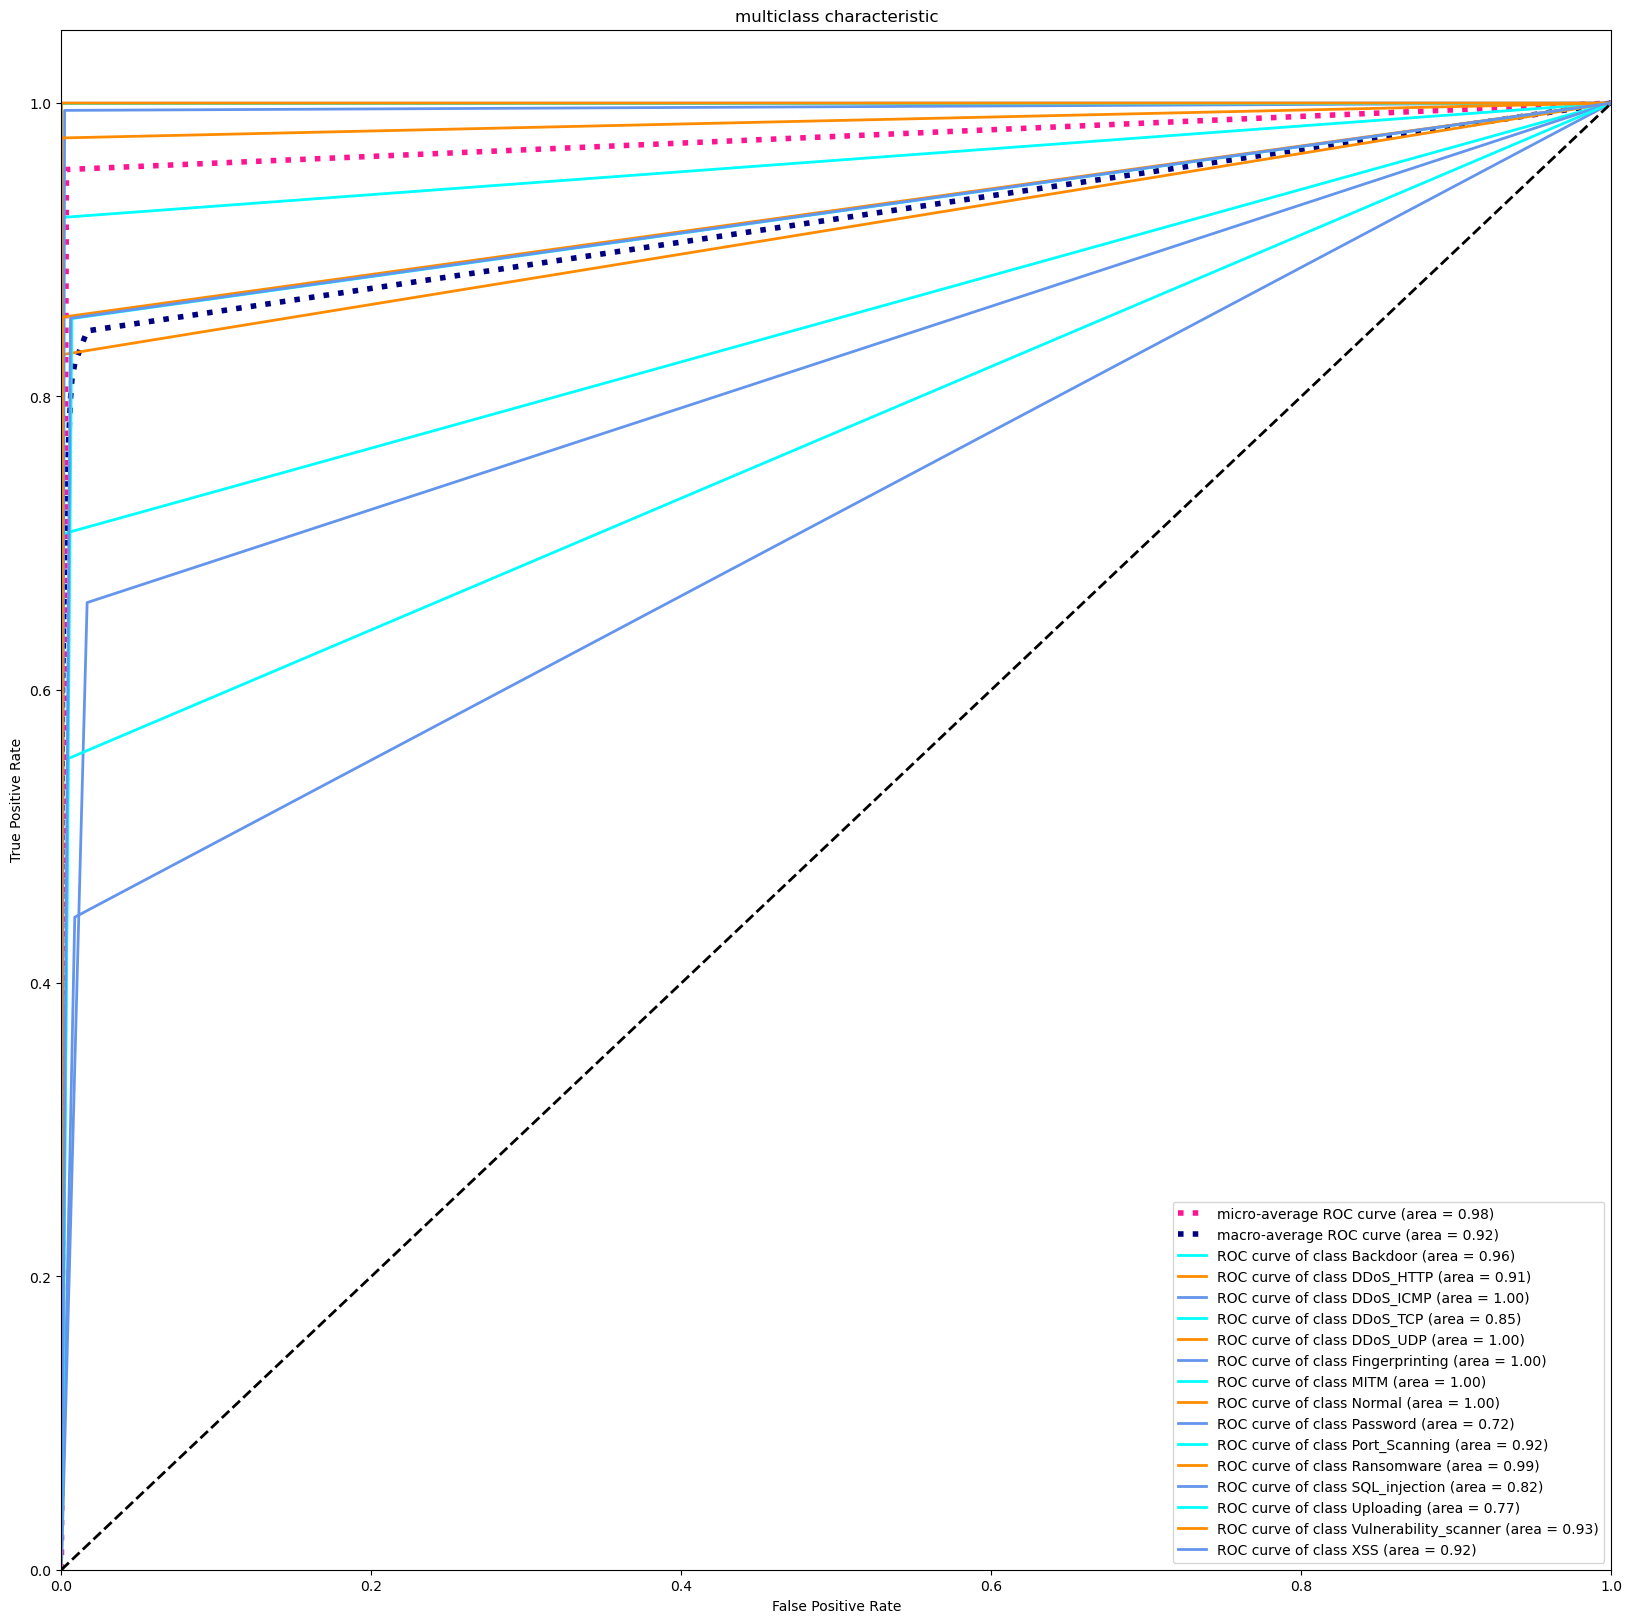

In [102]:


ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, num_classes)



Accuracy:  0.9546842225031036
Precision::  0.9546842225031036
Recall::  0.9546842225031036
F1_Score::  0.9546842225031036

Macro precision_recall_fscore_support (macro) average
(0.7910276570316727, 0.8430250903948849, 0.7895076150378292, None)

Macro precision_recall_fscore_support (micro) average
(0.9546842225031036, 0.9546842225031036, 0.9546842225031036, None)

Macro precision_recall_fscore_support (weighted) average
(0.9620117234813148, 0.9546842225031036, 0.9563776559799352, None)

Confusion Matrix

Classification Report
                       precision    recall  f1-score   support

             Backdoor       1.00      0.92      0.96      4972
            DDoS_HTTP       0.96      0.83      0.89      9982
            DDoS_ICMP       1.00      1.00      1.00     23287
             DDoS_TCP       0.98      0.71      0.82     10012
             DDoS_UDP       1.00      1.00      1.00     24314
       Fingerprinting       0.18      0.99      0.30       200
                 MITM     

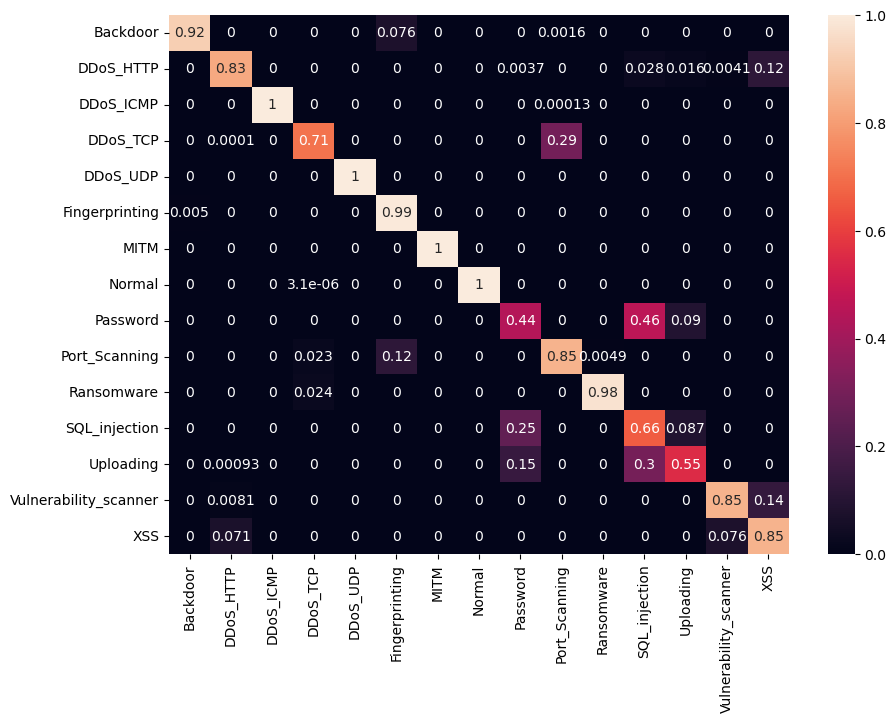

In [103]:
print_score(y_hat, y_true, label_encoder)